# Hack the Markets

##### Imports

In [516]:
#data analysis
import numpy as np
import pandas as pd
from numpy import asarray

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as fplt

#statistics
import statistics
import math

In [538]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

In [517]:
df = pd.read_csv('EURGBP.csv', sep=';')
df.head(10)

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,NaN,NaN,NaN,NaN
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,NaN,NaN,NaN,NaN
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,NaN,NaN,NaN,NaN
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,NaN,NaN,NaN,NaN
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,NaN,NaN,NaN,NaN


In [518]:
#values higher than 100 are mistake - getting the real value
df.loc[df['Open'] > 100, 'Open'] = df['Open']/1000
df.loc[df['High'] > 100, 'High'] = df['High']/1000
df.loc[df['Low'] > 100, 'Low'] = df['Low']/1000
df.loc[df['Close'] > 100, 'Close'] = df['Close']/1000
df.head()

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,0.63300,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,0.62900,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,0.6090,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,0.5990,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,0.5980,0.6158,NaN,NaN,NaN,NaN


In [519]:
#do I have nan values?
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
rsi           14
ema_fast      13
ema_slow      41
volatility    14
dtype: int64

In [520]:
#types of values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1021 non-null   float64
 6   ema_fast    1022 non-null   float64
 7   ema_slow    994 non-null    float64
 8   volatility  1021 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


In [521]:
#change index to date
df = df.set_index('Date')
df.head(3)

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
Date,,,,,,,,
2000-01-03,0.6281,0.6330,0.6235,0.6272,NaN,NaN,NaN,NaN
2000-01-10,0.6271,0.6290,0.6181,0.6197,NaN,NaN,NaN,NaN
2000-01-17,0.6200,0.6225,0.6072,0.6090,NaN,NaN,NaN,NaN


In [522]:
#daily return
df['Daily_return'] = df['Close'].pct_change()
df.head(3)

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,Daily_return
Date,,,,,,,,,
2000-01-03,0.6281,0.6330,0.6235,0.6272,NaN,NaN,NaN,NaN,NaN
2000-01-10,0.6271,0.6290,0.6181,0.6197,NaN,NaN,NaN,NaN,-0.011958
2000-01-17,0.6200,0.6225,0.6072,0.6090,NaN,NaN,NaN,NaN,-0.017266


In [523]:
#get only values from 2015 to 2019 because the referendum about Brexit happened in 2016
#take 2015 as well to compare
df1 = df[df.index > '2014-12-31']
df1.head(3)

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,Daily_return
Date,,,,,,,,,
2015-01-05,0.78154,0.78554,0.77866,0.78147,40.793498,0.787374,0.798571,1.332218,-0.000013
2015-01-12,0.78141,0.78291,0.75976,0.76360,31.336201,0.784204,0.796945,1.482559,-0.022867
2015-01-19,0.76350,0.77124,0.74040,0.74227,24.141774,0.778613,0.794402,1.712995,-0.027933


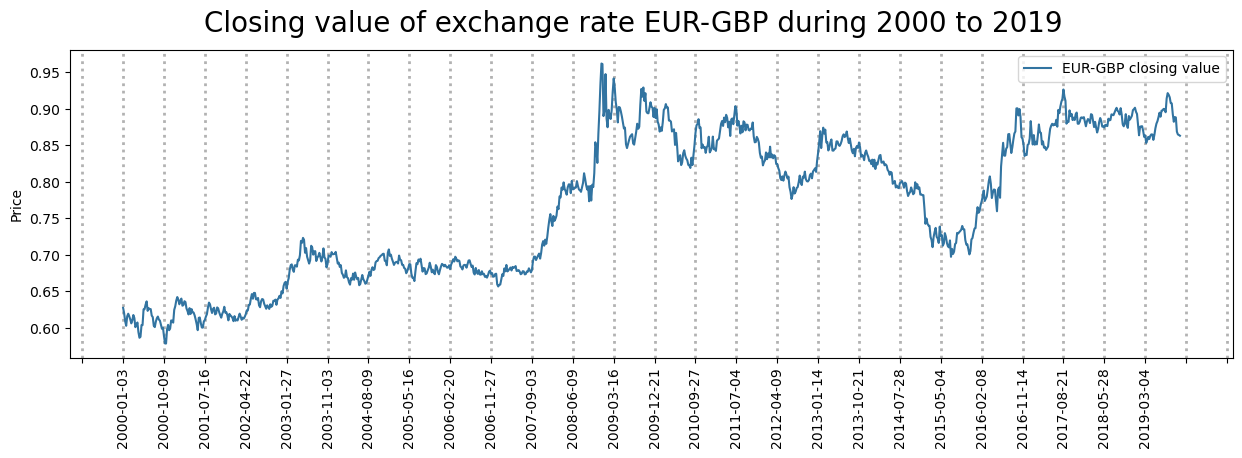

In [526]:
fig, ax = plt.subplots(figsize =(15, 4))

sns.lineplot(x=df.index,y=df['Close'],color='#3274A1',label='EUR-GBP closing value')
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Closing value of exchange rate EUR-GBP during 2000 to 2019",fontsize=20)
plt.savefig('1.png',bbox_inches='tight')
plt.show()

History events:
- 29.9.2008: Stock Market Crash, global financial crisis.
- 23.6.2016: Referendum about Brexit. 

From the diagram we can observe very important decreasing values during the year 2016, during the Brexit referendum.

In [536]:
df['Month'] = pd.DatetimeIndex(df.index).month
df['Year'] = pd.DatetimeIndex(df.index).year
df.head(3)

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,Daily_return,Month,Year
Date,,,,,,,,,,,
2000-01-03,0.6281,0.6330,0.6235,0.6272,NaN,NaN,NaN,NaN,NaN,1,2000
2000-01-10,0.6271,0.6290,0.6181,0.6197,NaN,NaN,NaN,NaN,-0.011958,1,2000
2000-01-17,0.6200,0.6225,0.6072,0.6090,NaN,NaN,NaN,NaN,-0.017266,1,2000


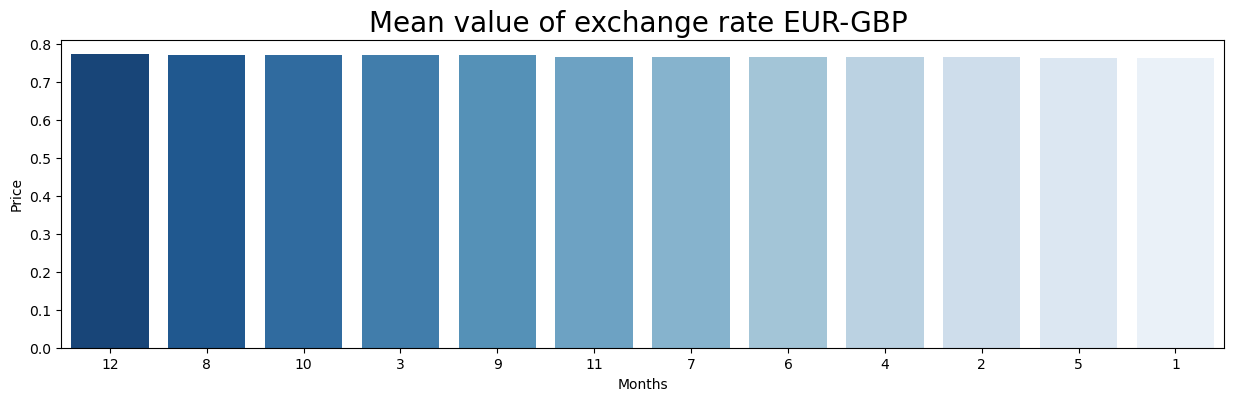

In [539]:
#months with higher average
high_close = df.groupby(by=["Month"]).mean()
high_close = high_close.sort_values(['Close'],ascending=False)
high_close['Month'] = high_close.index
high_close.reset_index(drop=True, inplace=True)

plt.figure(figsize =(15, 4))
sns.barplot(x="Month", y="Close", data=high_close,order=high_close['Month'], palette="Blues_r")
    
plt.title("Mean value of exchange rate EUR-GBP ",fontsize=20)
plt.xlabel("Months")
plt.ylabel("Price")
plt.savefig('2.png',bbox_inches='tight')
plt.show()

Average price doesn't change significantly based on months. Normally in financial time series there is no common pattern between months.

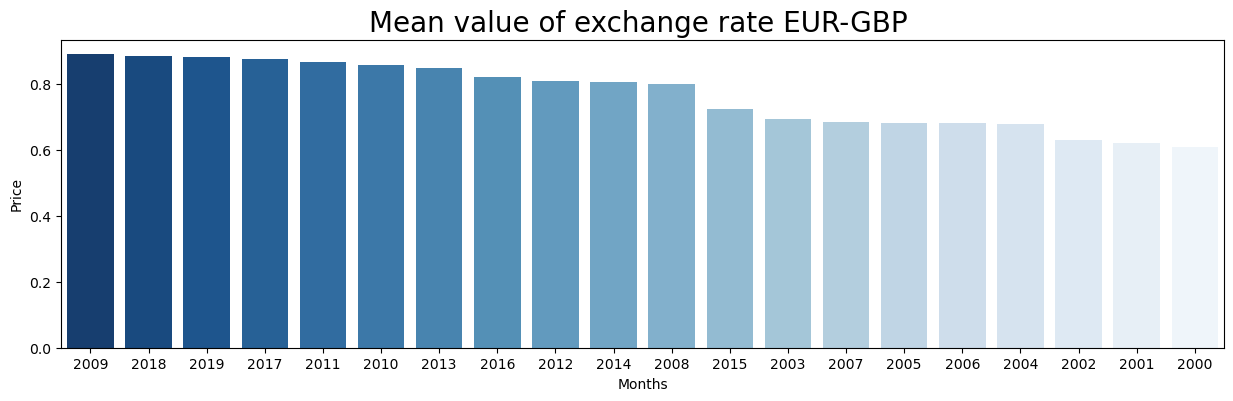

In [529]:
#months with higher average
high_close = df.groupby(by=["Year"]).mean()
high_close = high_close.sort_values(['Close'],ascending=False)
high_close['Year'] = high_close.index
high_close.reset_index(drop=True, inplace=True)

plt.figure(figsize =(15, 4))
sns.barplot(x="Year", y="Close", data=high_close,order=high_close['Year'], palette="Blues_r")
    
plt.title("Mean value of exchange rate EUR-GBP ",fontsize=20)
plt.xlabel("Months")
plt.ylabel("Price")
plt.savefig('3.png',bbox_inches='tight')
plt.show()

When we observe the average exchange rate based on years, we can observe that year 2016 has much lower average exchange rate than the overall tendency.

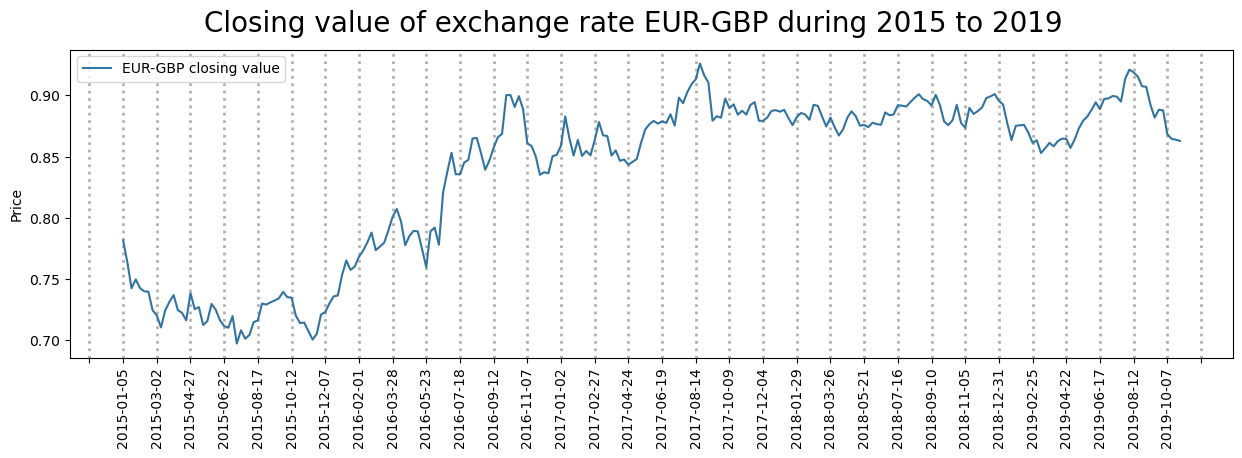

In [531]:
fig, ax = plt.subplots(figsize =(15, 4))

sns.lineplot(x=df1.index,y=df1['Close'],color='#3274A1',label='EUR-GBP closing value')
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Closing value of exchange rate EUR-GBP during 2015 to 2019",fontsize=20)
plt.savefig('5.png',bbox_inches='tight')
plt.show()

History events:
- 23.6.2016: Referendum about Brexit.
- 11.7.2016: Theresa May wins the Conservative Party leadership contest and becomes prime minister.
- 2.10.2016: Theresa May tells that she will trigger the EU’s Article 50.
- 29.3.2017: European Council formally triggered Article 50.
- 17.7.2017: Brexit talks officially get underway in Brussels.
- 6.7.2018: May unveils Chequers plan.
- 25.11.2018: The UK and the EU strike a deal on the UK’s exit terms.
- 29.3.2019: UK expected to leave EU but Article 50 was extended.
- 2.4.2019: Article 50 was extended.
- 23.7.2019: Boris Johnson enters Downing Street as the UK’s new prime minister.
- 19.8.2019: Boris Johnson issues a formal plea to the EU to ditch the Irish backstop from the withdrawal agreement. The EU refuses.
- 31.1.2020: UK left the EU and entered a transition period.
- 31.12.2020: UK left the EU, single market and customs union.

In [530]:
#select 2016 year
df2 = df[df.index > '2016-01-01']
df3 = df2[df2.index < '2016-12-31']

df3 = df3[['Open','High','Low','Close']]
df3.index = pd.DatetimeIndex(df3.index)

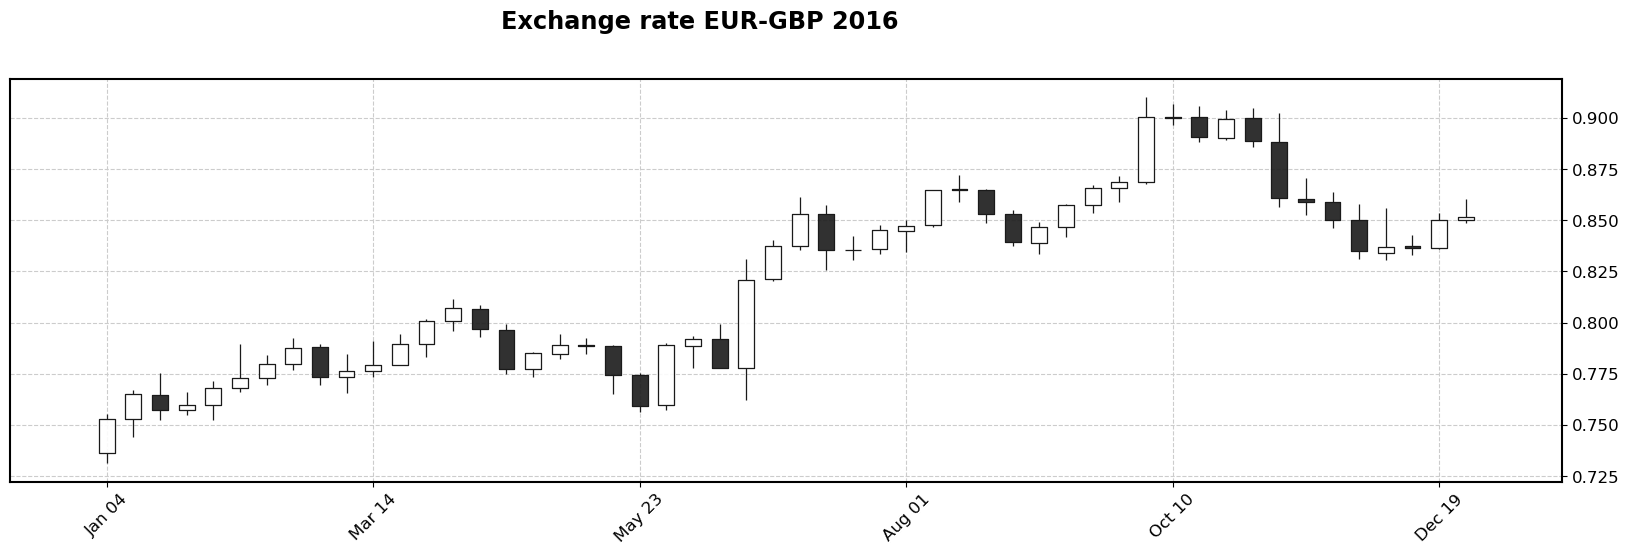

In [535]:
fplt.plot(df3,
          type='candle',
          title='Exchange rate EUR-GBP 2016',
          style="classic", 
          ylabel='',
          figratio=(15,4))

Just like a bar chart, a daily candlestick shows the market's open, high, low, and close price for the day. This real body represents the price range between the open and close of that day's trading. When the real body is filled in or black, it means the close was lower than the open.

We can observe that around Brexit referendum there were days with lower close value and also in October, when Teresa May announced that she will trigger the EU’s Article 50.

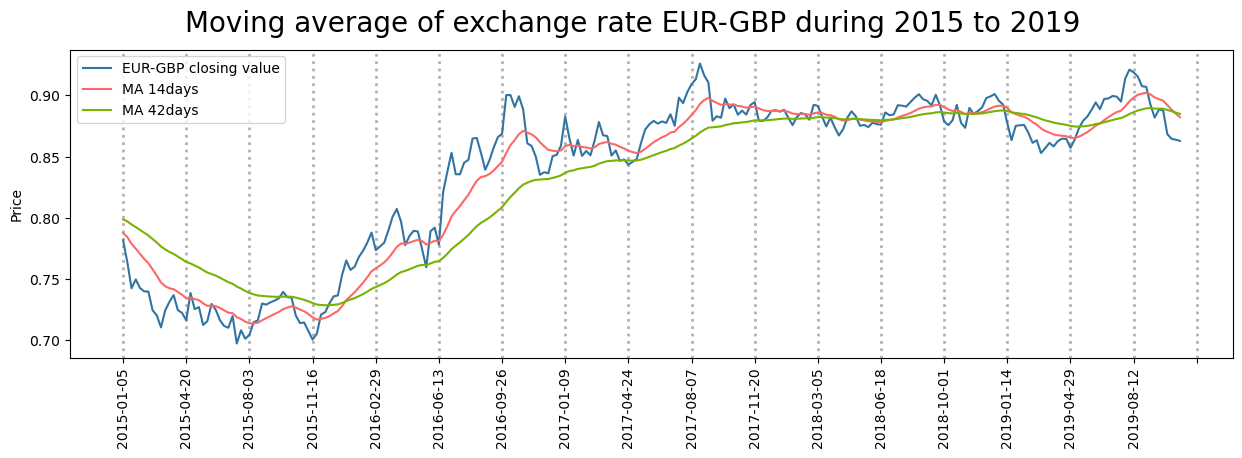

In [532]:
fig, ax = plt.subplots(figsize =(15, 4))

sns.lineplot(x=df1.index,y=df1['Close'],color='#3274A1',label='EUR-GBP closing value')
sns.lineplot(x=df1.index,y=df1['ema_fast'],color='#ff6666',label='MA 14days')
sns.lineplot(x=df1.index,y=df1['ema_slow'],color='#77b300',label='MA 42days')
plt.tick_params(axis='x', rotation=90)
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
ax.xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=19))
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Moving average of exchange rate EUR-GBP during 2015 to 2019",fontsize=20)
plt.savefig('5.png',bbox_inches='tight')
plt.show()

Moving average used to identify the trend direction of a stock to determine its support and resistance levels. 

We can observe an upward trend during almost the all Brexit period. This is confirmed with a bullish crossover, short-term moving average crosses above a longer-term average.

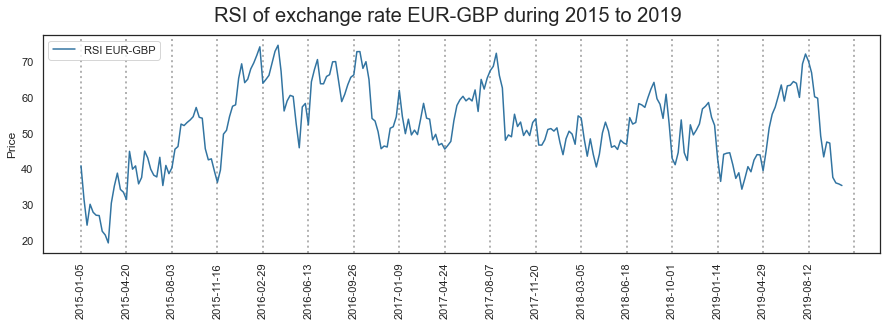

In [403]:
fig, ax = plt.subplots(figsize =(15, 4))

sns.lineplot(x=df1.index,y=df1['rsi'],color='#3274A1',label='RSI EUR-GBP')
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=19))
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("RSI of exchange rate EUR-GBP during 2015 to 2019",fontsize=20)
plt.savefig('6.png',bbox_inches='tight')
plt.show()

Relative Strength Index - the strength of the price, momentum indicator that shows how a stock has performed relative to its own price over a certain period.

Values of 70 or above indicate that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective pullback in price. An RSI reading of 30 or below indicates an oversold or undervalued condition.

During the important events the rate is getting close to 70. That means there were overbought conditions in a market. Treshold 70 is considered an alarm trigger, because buyers are overwhelming the price and the correction is inevitable.

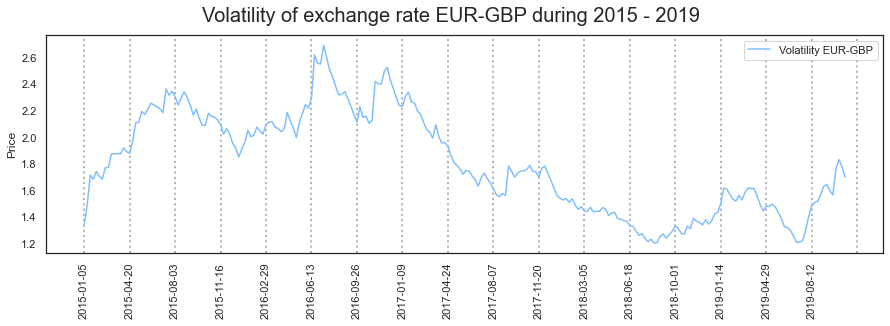

In [404]:
fig, ax = plt.subplots(figsize =(15, 4))

sns.lineplot(x=df1.index,y=df1['volatility'],color='#80bfff',label='Volatility EUR-GBP')
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=19))
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Volatility of exchange rate EUR-GBP during 2015 - 2019",fontsize=20)
plt.savefig('7.png',bbox_inches='tight')
plt.show()

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security.

From the diagram we can observe high volatility around the referendum of Brexit in 2016. That means that in that period there were high swings around the mean value and low predictability of the expected future value. The amount of uncertainty or risk related to EUR and GBP currency was very high.

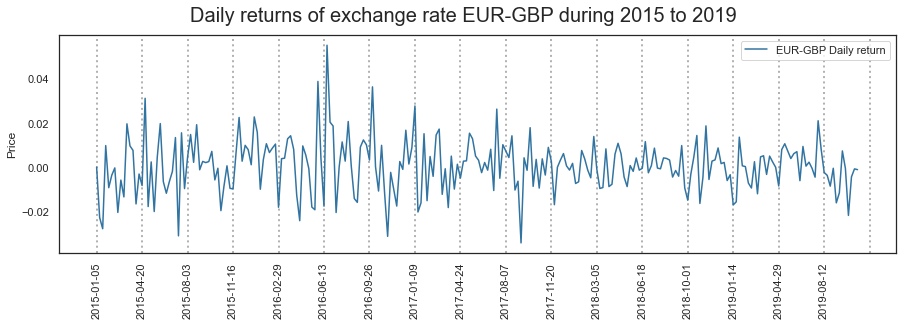

In [405]:
#daily return
fig, ax = plt.subplots(figsize =(15, 4))

sns.lineplot(x=df1.index,y=df1['Daily_return'],color='#3274A1',label='EUR-GBP Daily return')
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=19))
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Daily returns of exchange rate EUR-GBP during 2015 to 2019",fontsize=20)
plt.savefig('8.png',bbox_inches='tight')
plt.show()

The daily return measures the EUR-GBP exchange rate trade as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

High peak in 2016 indicates that before the referendum the investor who sold gain a lot of money because after the referendum the price went sharply down.

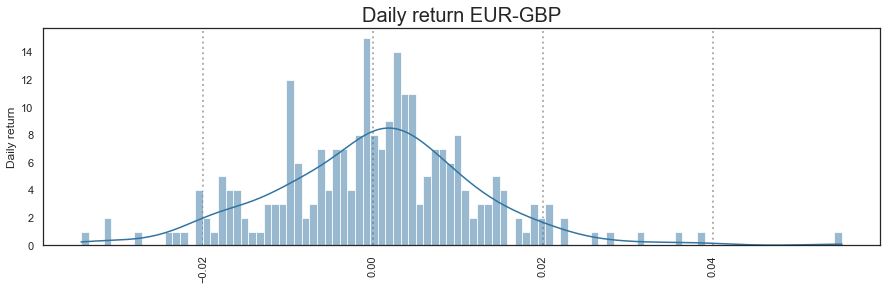

In [358]:
#daily return distribution
plt.figure(figsize =(15, 4))

sns.histplot(df1['Close'].pct_change(),color='#3274A1',bins=100, kde=True)
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.tick_params(axis='x', rotation=90)
plt.xlabel("")
plt.ylabel("Daily return")
plt.title("Daily return EUR-GBP",fontsize=20)
plt.savefig('9.png',bbox_inches='tight')
plt.show()

In [380]:
#stocks
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [408]:
df_eur_usd = yf.download('EURUSD=X','2015-01-02','2019-10-29')
df_gbp_usd = yf.download('GBPUSD=X','2015-01-02','2019-10-29')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [409]:
df_eur_usd['Daily_return'] = df_eur_usd['Close'].pct_change()
df_gbp_usd['Daily_return'] = df_gbp_usd['Close'].pct_change()

In [410]:
df_eur_usd.head(3)

,Open,High,Low,Close,Adj Close,Volume,Daily_return
Date,,,,,,,
2015-01-01,1.209863,1.209863,1.209863,1.209863,1.209863,0,NaN
2015-01-02,1.208868,1.208956,1.201080,1.208941,1.208941,0,-0.000762
2015-01-05,1.195500,1.197590,1.188909,1.194643,1.194643,0,-0.011827


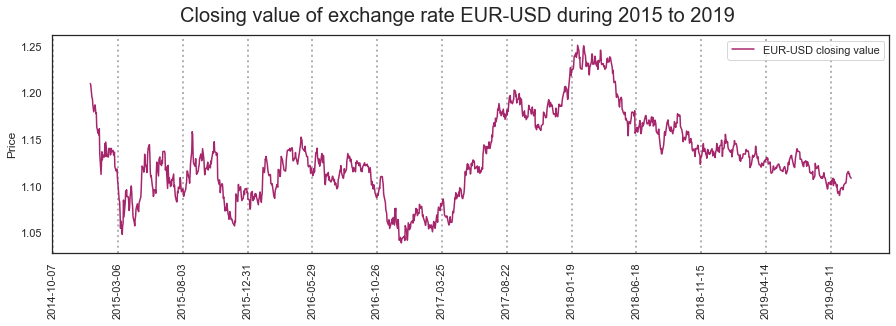

In [412]:
fig, ax = plt.subplots(figsize =(15, 4))
sns.lineplot(x=df_eur_usd.index,y=df_eur_usd['Close'],color='#A6266C',label='EUR-USD closing value')
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=19))
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Closing value of exchange rate EUR-USD during 2015 to 2019",fontsize=20)
plt.savefig('10.png',bbox_inches='tight')
plt.show()

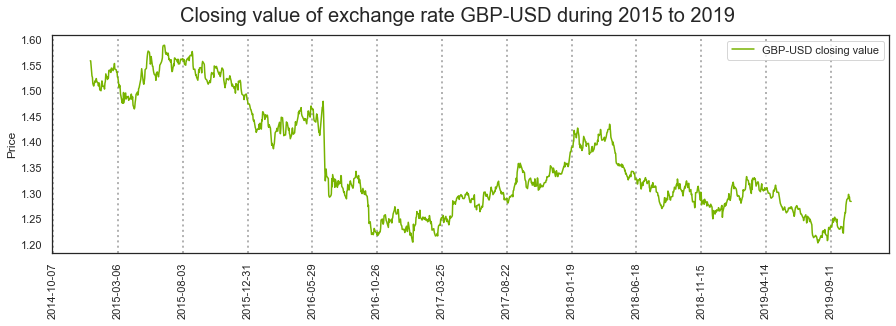

In [413]:
fig, ax = plt.subplots(figsize =(15, 4))
sns.lineplot(x=df_gbp_usd.index,y=df_gbp_usd['Close'],color='#77b300',label='GBP-USD closing value')
plt.grid(axis="x", color="black", alpha=.3, linewidth=2, linestyle=":")
plt.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=19))
plt.xlabel("")
plt.ylabel("Price")
plt.suptitle("Closing value of exchange rate GBP-USD during 2015 to 2019",fontsize=20)
plt.savefig('11.png',bbox_inches='tight')
plt.show()

In [396]:
df_eur_usd.rename(columns={"Close": "EURUSDClose", "Daily_return": "EURUSDDaily_return"}, inplace=True)
df_eur_usd.head()

,Open,High,Low,EURUSDClose,Adj Close,Volume,EURUSDDaily_return
Date,,,,,,,
2015-01-01,1.209863,1.209863,1.209863,1.209863,1.209863,0,NaN
2015-01-02,1.208868,1.208956,1.201080,1.208941,1.208941,0,-0.000762
2015-01-05,1.195500,1.197590,1.188909,1.194643,1.194643,0,-0.011827
2015-01-06,1.193830,1.197000,1.188693,1.193902,1.193902,0,-0.000621
2015-01-07,1.187479,1.190000,1.180401,1.187536,1.187536,0,-0.005332


In [397]:
df_gbp_usd.rename(columns={"Close": "GBPUSDClose", "Daily_return": "GBPUSDDaily_return"}, inplace=True)
df_gbp_usd.head()

,Open,High,Low,GBPUSDClose,Adj Close,Volume,GBPUSDDaily_return
Date,,,,,,,
2015-01-01,1.558094,1.558094,1.558094,1.558094,1.558094,0,NaN
2015-01-02,1.558021,1.558458,1.538746,1.557972,1.557972,0,-0.000078
2015-01-05,1.528608,1.532004,1.520612,1.528491,1.528491,0,-0.018923
2015-01-06,1.525832,1.527370,1.515795,1.525832,1.525832,0,-0.001739
2015-01-07,1.513638,1.515611,1.506796,1.513798,1.513798,0,-0.007887


In [399]:
result = pd.concat([df_eur_usd, df_gbp_usd], axis=1)

In [401]:
data = result[["EURUSDClose","EURUSDDaily_return", "GBPUSDClose","GBPUSDDaily_return"]]
data.head(3)

,EURUSDClose,EURUSDDaily_return,GBPUSDClose,GBPUSDDaily_return
Date,,,,
2015-01-01,1.209863,NaN,1.558094,NaN
2015-01-02,1.208941,-0.000762,1.557972,-0.000078
2015-01-05,1.194643,-0.011827,1.528491,-0.018923


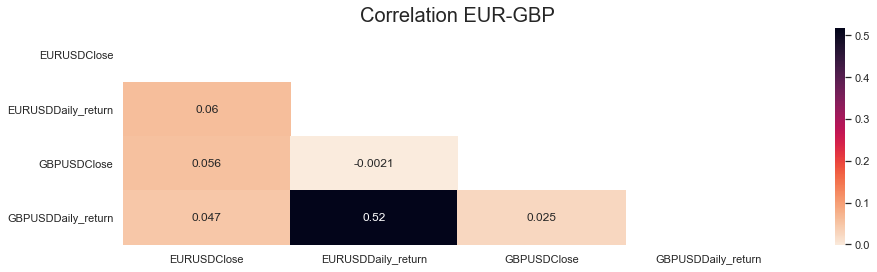

In [402]:
#correlation
fig,ax = plt.subplots(figsize=(15,4))
corr = data.corr()
sns.set_theme(style="white")
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="rocket_r")
plt.title("Correlation EUR-GBP",fontsize=20)
plt.savefig('12.png',bbox_inches='tight')
plt.show()

There is a correlation between EUR-USD and GBP-USD Daily return. That means the prices go together in tandem and everything happens to GBP is reflected on the EUR-USD exchange rate. 

That is the reason why the European Central Bank need to monitor carefully the exchange rates of GBP because it could affect in large scale all foreign inversions in USD currency.